# Mechanisms of Action (MoA) Prediction: EDA
***

![image1](https://mk0labiotecheugl43g7.kinstacdn.com/wp-content/uploads/2020/04/dna-repair-cancer-forx-therapeutics.jpg)<div align="center">Image credit: https://www.labiotech.eu/cancer/forx-therapeutics-cancer-treatment/</div>

In this competition, we are suposed to develop algorithms and train models **to determine the mechanism of action of a new drug based on the gene expression and cell viability information.** In this EDA, we will try to find patterns in the data, interactions between the targets in both scored and nonscored datasets and the relationship between targets and their target genes.
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">PROJECT CONTENT</h3>
    
> ####  1- FEATURES OVERVIEW
> ####  2- CELL VIABILITY FEATURES
> ####  3. GENE EXPRESSION FEATURES
> ####  4. TARGETS *(MoA)*
    >> ##### 4.1 Scored targets
    >> ##### 4.2 Non-Scored targets

> ####  5. TEST FEATURES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
############################################
### DATASETS:

a= pd.read_csv('/kaggle/input/lish-moa/train_features.csv')
b= pd.read_csv('/kaggle/input/lish-moa/test_features.csv')
c=pd.read_csv('/kaggle/input/lish-moa/train_targets_nonscored.csv')
d=pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')

merged=pd.concat([a,b])

#Datasets for treated and control experiments
treated= a[a['cp_type']=='trt_cp']
control= a[a['cp_type']=='ctl_vehicle']

#Treatment time datasets
cp24= a[a['cp_time']== 24]
cp48= a[a['cp_time']== 48]
cp72= a[a['cp_time']== 72]

#Merge scored and nonscored labels
all_drugs= pd.merge(d, c, on='sig_id', how='inner')

#Treated drugs without control
treated_list = treated['sig_id'].to_list()
drugs_tr= d[d['sig_id'].isin(treated_list)]

#Treated drugs:
nonscored= c[c['sig_id'].isin(treated_list)]
scored= d[d['sig_id'].isin(treated_list)]

#adt= All Drugs Treated
adt= all_drugs[all_drugs['sig_id'].isin(treated_list)]

#Select the columns c-
c_cols = [col for col in a.columns if 'c-' in col]
#Filter the columns c-
cells=treated[c_cols]

#Select the columns g-
g_cols = [col for col in a.columns if 'g-' in col]
#Filter the columns g-
genes=treated[g_cols]



#####################################################
#### HELPER FUNCTIONS

def plotd(f1):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(15,5))
    #1 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.hist(control[f1], bins=4, color='mediumpurple',alpha=0.5)
    plt.title(f'control: {f1}',weight='bold', fontsize=18)
    #first row sec col
    ax1 = plt.subplot2grid((1,2),(0,1))
    plt.hist(treated[f1], bins=4, color='darkcyan',alpha=0.5)
    plt.title(f'Treated with drugs: {f1}',weight='bold', fontsize=18)
    plt.show()
    
def plott(f1):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(15,5))
    #1 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((1,3),(0,0))
    plt.hist(cp24[f1], bins=3, color='deepskyblue',alpha=0.5)
    plt.title(f'Treatment duration 24h: {f1}',weight='bold', fontsize=14)
    #first row sec col
    ax1 = plt.subplot2grid((1,3),(0,1))
    plt.hist(cp48[f1], bins=3, color='lightgreen',alpha=0.5)
    plt.title(f'Treatment duration 48h: {f1}',weight='bold', fontsize=14)
    #first row 3rd column
    ax1 = plt.subplot2grid((1,3),(0,2))
    plt.hist(cp72[f1], bins=3, color='gold',alpha=0.5)
    plt.title(f'Treatment duration 72h: {f1}',weight='bold', fontsize=14)
    plt.show()

def plotf(f1, f2, f3, f4):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')

    fig= plt.figure(figsize=(15,10))
    #2 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((2,2),(0,0))
    sns.distplot(a[f1], color='crimson')
    plt.title(f1,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #first row sec col
    ax1 = plt.subplot2grid((2,2), (0, 1))
    sns.distplot(a[f2], color='gainsboro')
    plt.title(f2,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #Second row first column
    ax1 = plt.subplot2grid((2,2), (1, 0))
    sns.distplot(a[f3], color='deepskyblue')
    plt.title(f3,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #second row second column
    ax1 = plt.subplot2grid((2,2), (1, 1))
    sns.distplot(a[f4], color='black')
    plt.title(f4,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    return plt.show()

def ploth(data, w=15, h=9):
    plt.figure(figsize=(w,h))
    sns.heatmap(data.corr(), cmap='hot')
    plt.title('Correlation between targets', fontsize=18, weight='bold')
    return plt.show()

# corrs function: Show dataframe of high correlation between features
def corrs(data, col1='Gene 1', col2='Gene 2',rows=5,thresh=0.8, pos=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53]):
        #Correlation between genes
        corre= data.corr()
         #Unstack the dataframe
        s = corre.unstack()
        so = s.sort_values(kind="quicksort", ascending=False)
        #Create new dataframe
        so2= pd.DataFrame(so).reset_index()
        so2= so2.rename(columns={0: 'correlation', 'level_0':col1, 'level_1': col2})
        #Filter out the coef 1 correlation between the same drugs
        so2= so2[so2['correlation'] != 1]
        #Drop pair duplicates
        so2= so2.reset_index()
        pos = pos
        so3= so2.drop(so2.index[pos])
        so3= so2.drop('index', axis=1)
        #Show the first 10 high correlations
        cm = sns.light_palette("Red", as_cmap=True)
        s = so3.head(rows).style.background_gradient(cmap=cm)
        print(f"{len(so2[so2['correlation']>thresh])/2} {col1} pairs have +{thresh} correlation.")
        return s

# 1-Overview: Features
***
**First glimpse: 876 features with:**
* Features **g-** signify gene expression data.
* Features **c-** signify cell viability data.
* **cp_type** indicates samples treated with a compound, **trt_cp** samples treated with the compounds. 
* **cp_vehicle** or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs.
* **cp_time** and **cp_dose** indicate treatment duration (24, 48, 72 hours) and dose (high or low).

In [2]:
a.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


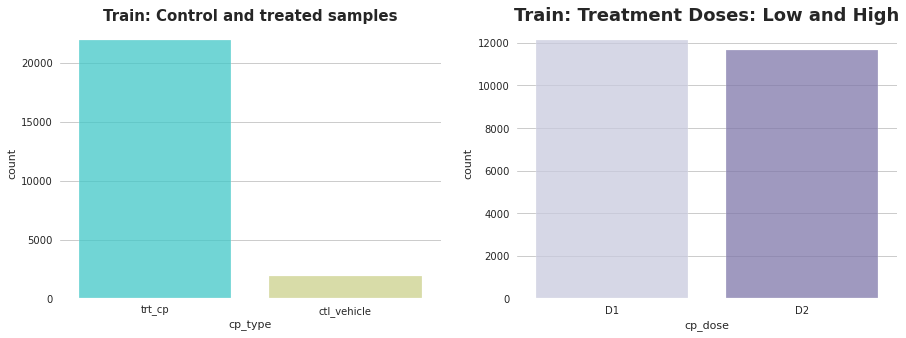

In [3]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='cp_type', data=a, palette='rainbow', alpha=0.75)
plt.title('Train: Control and treated samples', fontsize=15, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='cp_dose', data=a, palette='Purples', alpha=0.75)
plt.title('Train: Treatment Doses: Low and High',weight='bold', fontsize=18)
plt.show()

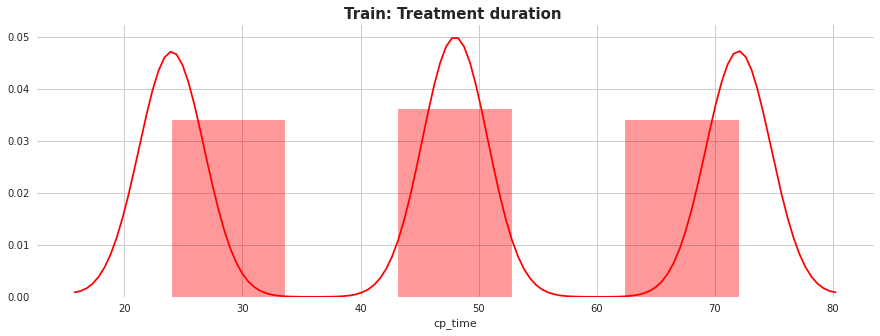

In [4]:
plt.figure(figsize=(15,5))
sns.distplot( a['cp_time'], color='red', bins=5)
plt.title("Train: Treatment duration ", fontsize=15, weight='bold')
plt.show()

* **Few control samples.**
* **The low and high doses were applied equally.**
* **3 treatment durations: 24h, 48h and 72h.**

# 2- `c-` Features are related to cell viability. What is cell viability? 

A viability assay is an assay that is created to determine the ability of organs, cells or tissues to maintain or recover a state of survival. Viability can be distinguished from the all-or-nothing states of life and death by the use of a quantifiable index that ranges between the integers of 0 and 1 or, if more easily understood, the range of 0% and 100%. Viability can be observed through the physical properties of cells, tissues, and organs. Some of these include mechanical activity, motility, such as with spermatozoa and granulocytes, the contraction of muscle tissue or cells, mitotic activity in cellular functions, and more. Viability assays provide a more precise basis for measurement of an organism's level of vitality.[1]

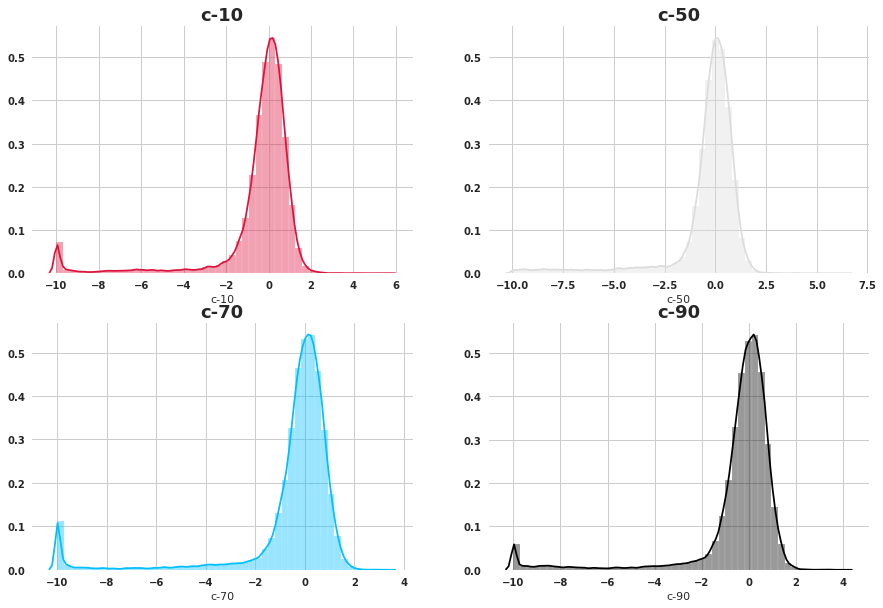

In [5]:
plotf('c-10', 'c-50', 'c-70', 'c-90')

***First observation in this EDA:***

As mentioned in the definition, cell viability should range between the integers 0 and 1. Here, we have values in the range -10 and 6 because the data were z-scored and then normalized using a procedure called [quantile normalization](https://clue.io/connectopedia/glossary#Q).

*A high negative cell viability measure reflects a high fraction of killing [@by the host](https://www.kaggle.com/c/lish-moa/discussion/191487).* In other words:
* High negative values = High number of dead cells
* High positive values = High number of living cells.

Next, let's see the difference between the cell viability in a control and treated sample.

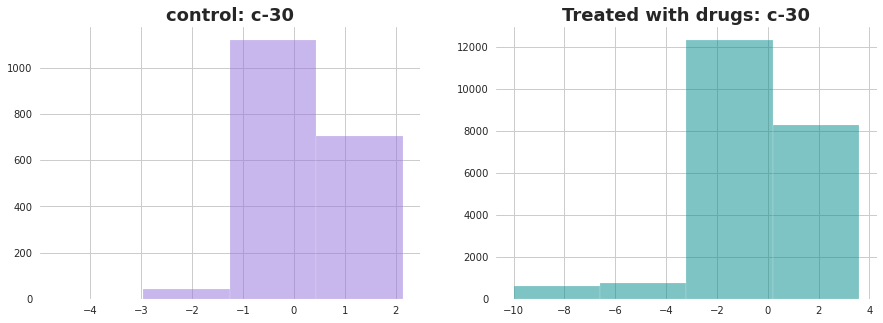

In [6]:
plotd("c-30")

This is just a first impression after checking multiple cell lines *(We need to check all the cell lines to draw conclusions).*

> **Next, let's see the impact of the treatment time on the cell viability.**

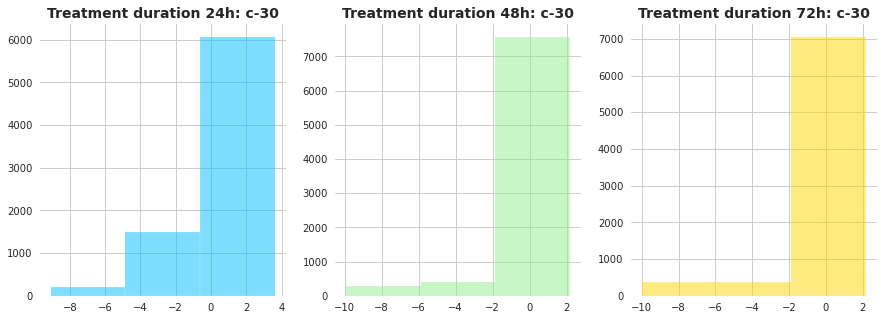

In [7]:
plott('c-30')

*(work in progress)*

> **Next let's see the correlation between cell viability features (in the treated samples, no control).**

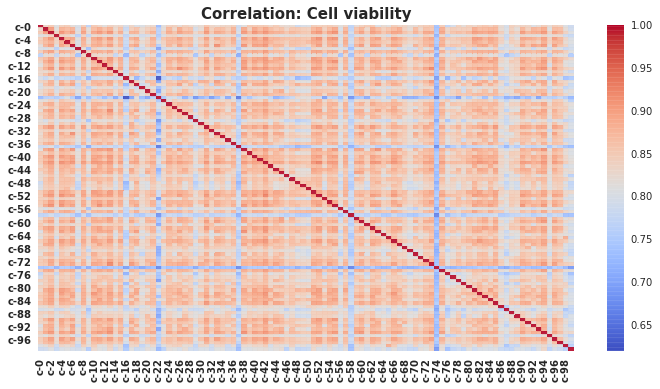

In [8]:
#Select the columns c-
c_cols = [col for col in a.columns if 'c-' in col]
#Filter the columns c-
cells=treated[c_cols]
#Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cells.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Correlation: Cell viability', fontsize=15, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [9]:
corrs(cells, 'Cell', 'Cell 2', rows=7)

4187.0 Cell pairs have +0.8 correlation.


,Cell,Cell 2,correlation
0,c-52,c-42,0.927873
1,c-42,c-52,0.927873
2,c-13,c-73,0.924338
3,c-73,c-13,0.924338
4,c-13,c-26,0.924001
5,c-26,c-13,0.924001
6,c-11,c-55,0.917963


* **Many high correlations between c- features. This is something to be taken into consideration in feature engineering.**
***

# 3- `g-` Features are related to gene expression. What is gene expression?

Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins. You can refer to my notebook [COVID_19: Viral proteins identification](https://www.kaggle.com/amiiiney/covid-19-proteins-identification-with-biopython) to understand more how gene expression works.

In short, the mechanism of action of the 207 targets in this study will activate some genes, gene expression will take place and byproducts (proteins) will be synthesized.

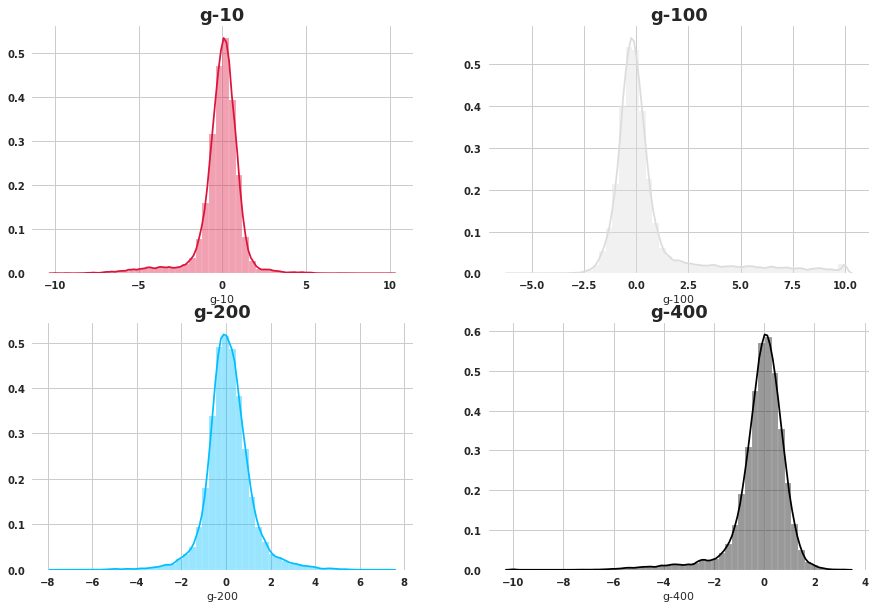

In [10]:
plotf('g-10','g-100','g-200','g-400')

***How to interpret those values?***

Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). [3]

> To understand this better, let's compare the samples treated with the drugs and the control samples.

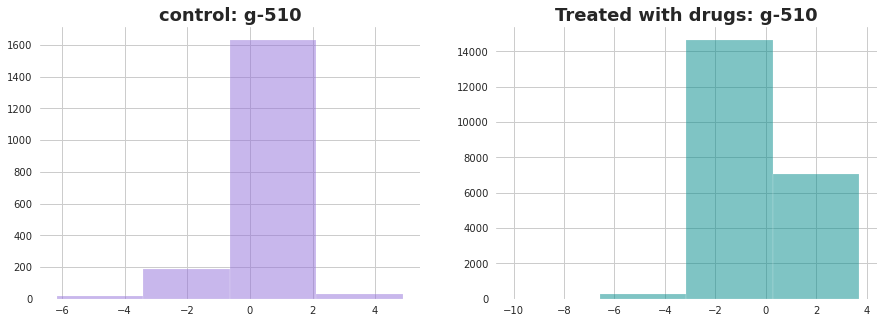

In [11]:
plotd('g-510')

Again, we have to check all the genes to draw conclusions, 

**Next, let's check the impact of the treatment time on the gene expression.**

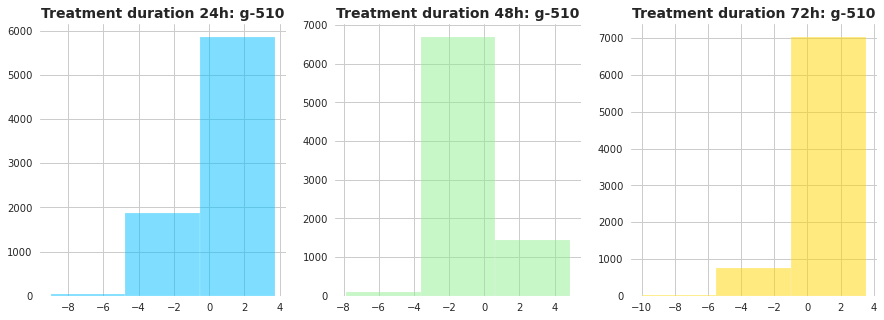

In [12]:
plott('g-510')

*(work in progress)*

> **Next, let's see the correlation between gene expression features. (in the treated samples, no control)**

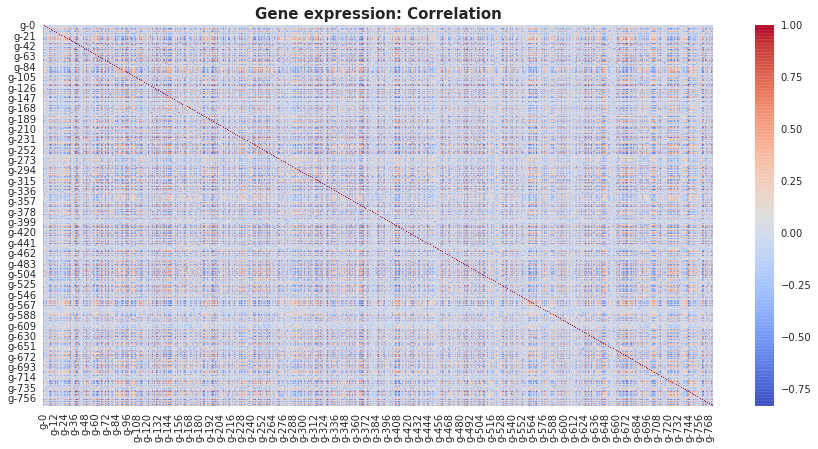

In [13]:
#Select the columns g-
g_cols = [col for col in a.columns if 'g-' in col]
#Filter the columns g-
genes=treated[g_cols]
#Plot heatmap
plt.figure(figsize=(15,7))
sns.heatmap(genes.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Gene expression: Correlation', fontsize=15, weight='bold')
plt.show()

* **We have both negative and positive correlations here between genes. Interesting!** *(The control samples were not included, so the negative correlation between some genes is not related to the control/treated samples).*

Let's have a closer look at the high correlation genes.

In [14]:
corrs(genes, 'Gene', 'Gene 2')

34.0 Gene pairs have +0.8 correlation.


,Gene,Gene 2,correlation
0,g-37,g-50,0.912383
1,g-50,g-37,0.912383
2,g-672,g-50,0.851694
3,g-50,g-672,0.851694
4,g-37,g-489,0.850502


**Strong negative correlation genes**

In [15]:
#Correlation between drugs
corre= genes.corr()
#Unstack the dataframe
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
#Create new dataframe
so2= pd.DataFrame(so).reset_index()
so2= so2.rename(columns={0: 'correlation', 'level_0':'Drug 1', 'level_1': 'Drug2'})
#Filter out the coef 1 correlation between the same drugs
so2= so2[so2['correlation'] != 1]
#Drop pair duplicates
so2= so2.reset_index()
so2= so2.sort_values(by=['correlation'])
pos = [1,3,5,7,9,11,13,15,17,19,21]
so2= so2.drop(so2.index[pos])
so2= so2.round(decimals=4)
so2=so2.drop('index', axis=1)
so3=so2.head(4)
#Show the first 10 high correlations
cm = sns.light_palette("Red", as_cmap=True)
s = so2.head().style.background_gradient(cmap=cm)
s

,Drug 1,Drug2,correlation
595211,g-349,g-228,-0.828500
595208,g-248,g-760,-0.822500
595206,g-228,g-460,-0.815500
595204,g-228,g-744,-0.815000
595202,g-63,g-349,-0.812000


We have 55 gene pairs with **+0.8** correlation. This information will be useful, we will come back to it in the following sections.


# 4-Targets *(MoA)*:
***
> ## 4-1 Scored targets:

This is a multi-label classification, we have 207 MoA and we have to find out the mechanism of action of the 5000 drugs that were treated in the `sig_id` samples. A single sample treated with a drug can have many active targets, in other words, one drug can have more than 1 mechanism of action, so we have to predict the mechanisms of action of each drug.

*We will filter the **train_targets_scored** dataset and keep just the treated rows (we discard the control rows because they are not treated with the drugs).*


In [16]:
#Filter out just the treated samples
scored= d[d['sig_id'].isin(treated_list)]

#Count unique values per column
cols = drugs_tr.columns.to_list() # specify the columns whose unique values you want here
uniques = {col: drugs_tr[col].nunique() for col in cols}
uniques=pd.DataFrame(uniques, index=[0]).T
uniques=uniques.rename(columns={0:'count'})
uniques= uniques.drop('sig_id', axis=0)


#Calculate the mean values
average=scored.mean()
average=pd.DataFrame(average)
average=average.rename(columns={ 0: 'mean'})
average['percentage']= average['mean']*100
#Filter just the drugs with mean >0.01
average_filtered= average[average['mean'] > 0.01]
average_filtered= average_filtered.reset_index()
average_filtered= average_filtered.rename(columns={'index': 'drug'})

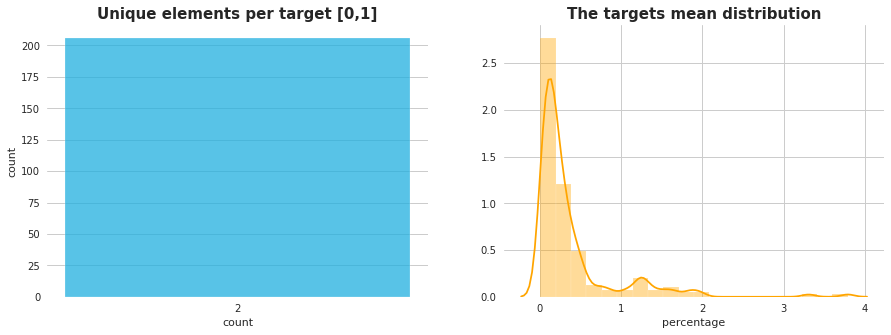

In [17]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(uniques['count'], color='deepskyblue', alpha=0.75)
plt.title('Unique elements per target [0,1]', fontsize=15, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(average['percentage'], color='orange', bins=20)
plt.title("The targets mean distribution", fontsize=15, weight='bold')
plt.show()

* All the targets are present in at least one sample.
* The presence of the targets is very low in the samples (Mostly less than 0.75%).
* Some targets *(outliers)* have a higher presence in comparison with the rest of targets with a percentage in the range (3%, 4%).

> **Let's have a look over some of these targets**

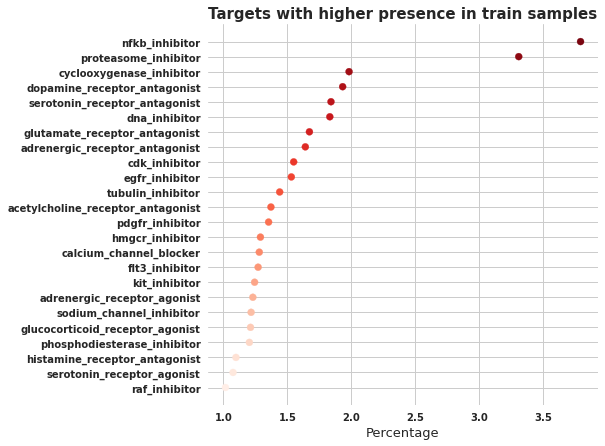

In [18]:
plt.figure(figsize=(7,7))
average_filtered.sort_values('percentage', inplace=True) 
plt.scatter(average_filtered['percentage'], average_filtered['drug'], color=sns.color_palette('Reds',len(average_filtered)))
plt.title('Targets with higher presence in train samples', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Percentage', fontsize=13)
plt.show()

* It seems we have 2 outliers here: **nfkb_inhibitor** and **proteasome_inhibitor.** 

* We can see many target labels in the plot: inhibitor, agonist, antagonist.


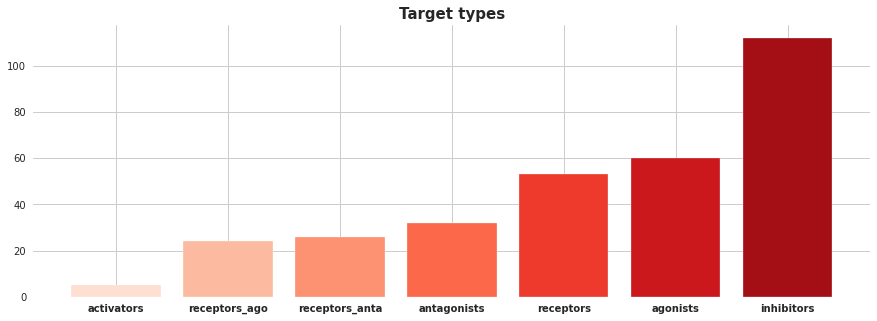

In [19]:
inhibitors = [col for col in d.columns if 'inhibitor' in col]
activators = [col for col in d.columns if 'activator' in col]
antagonists = [col for col in d.columns if 'antagonist' in col]
agonists = [col for col in d.columns if 'agonist' in col]
modulators = [col for col in d.columns if 'modulator' in col]
receptors = [col for col in d.columns if 'receptor' in col]
receptors_ago = [col for col in d.columns if 'receptor_agonist' in col]
receptors_anta = [col for col in d.columns if 'receptor_antagonist' in col]


labelss= {'Drugs': ['inhibitors', 'activators', 'antagonists', 'agonists', 'receptors', 'receptors_ago', 'receptors_anta'],
          'Count':[112,5,32,60, 53, 24, 26]}


labels= pd.DataFrame(labelss)
labels=labels.sort_values(by=['Count'])
plt.figure(figsize=(15,5))
plt.bar(labels['Drugs'], labels['Count'], color=sns.color_palette('Reds',len(labels)))
plt.xticks(weight='bold')
plt.title('Target types', weight='bold', fontsize=15)
plt.show()

* **Inhibitor targets** are dominating with 121 targets (out of 206).
* Agonists, receptors and antagonists come at the second plan.
***
### Correlation between targets:

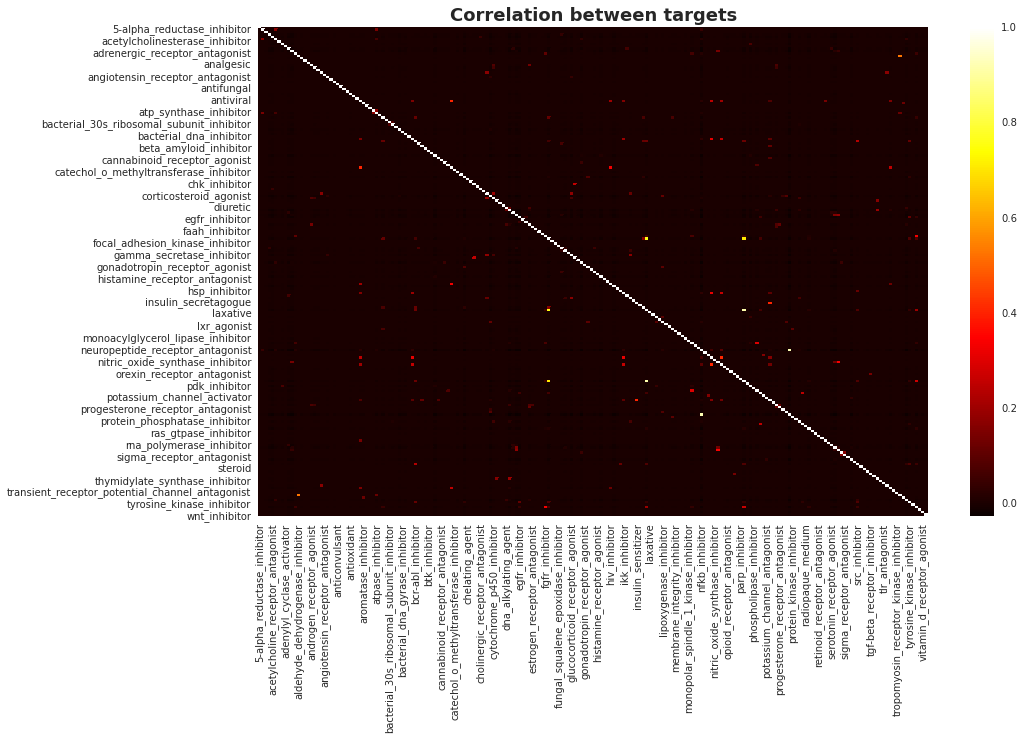

In [20]:
ploth(drugs_tr)

Most of the targets have 0 correlation. It is worth recalling that the presence of active targets in the samples in very low (mainly 1 or 2 targets per sample).

However, we notice some yellow dots *(high correlation)* between some targets. Let's have a closer look over these targets.

#### Targets with the highest MoA correlation

In [21]:
#Correlation between drugs
corre= drugs_tr.corr()
#Unstack the dataframe
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
#Create new dataframe
so2= pd.DataFrame(so).reset_index()
so2= so2.rename(columns={0: 'correlation', 'level_0':'Target 1', 'level_1': 'Target 2'})
#Filter out the coef 1 correlation between the same drugs
so2= so2[so2['correlation'] != 1]
#Drop pair duplicates
so2= so2.reset_index()
pos = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
so2= so2.drop(so2.index[pos])
so2= so2.round(decimals=4)
so2=so2.drop('index', axis=1)
so3=so2.head(4)
#Show the first 10 high correlations
cm = sns.light_palette("Red", as_cmap=True)
s = so2.head().style.background_gradient(cmap=cm)
s

,Target 1,Target 2,correlation
0,proteasome_inhibitor,nfkb_inhibitor,0.921100
2,pdgfr_inhibitor,kit_inhibitor,0.915500
4,flt3_inhibitor,kit_inhibitor,0.757900
6,pdgfr_inhibitor,flt3_inhibitor,0.704800
8,aldehyde_dehydrogenase_inhibitor,trpv_agonist,0.528900


* **2 Target-pairs have +0.9 correlation:** 

Those target pairs must be in the few samples that have more than two active targets. The functionality of these targets and their distribution is something to be taken into consideration because in this case, we have **a multi-label classification problem**, where the correlation between the labels is also important and the model selection should be based on the labels correlation. Select a model that finds patterns not just in the train data but also in the **multi-label target data.**

Below, we will try to connect the dots and try to match the high correlated targets with the targets with the most presence in the samples.

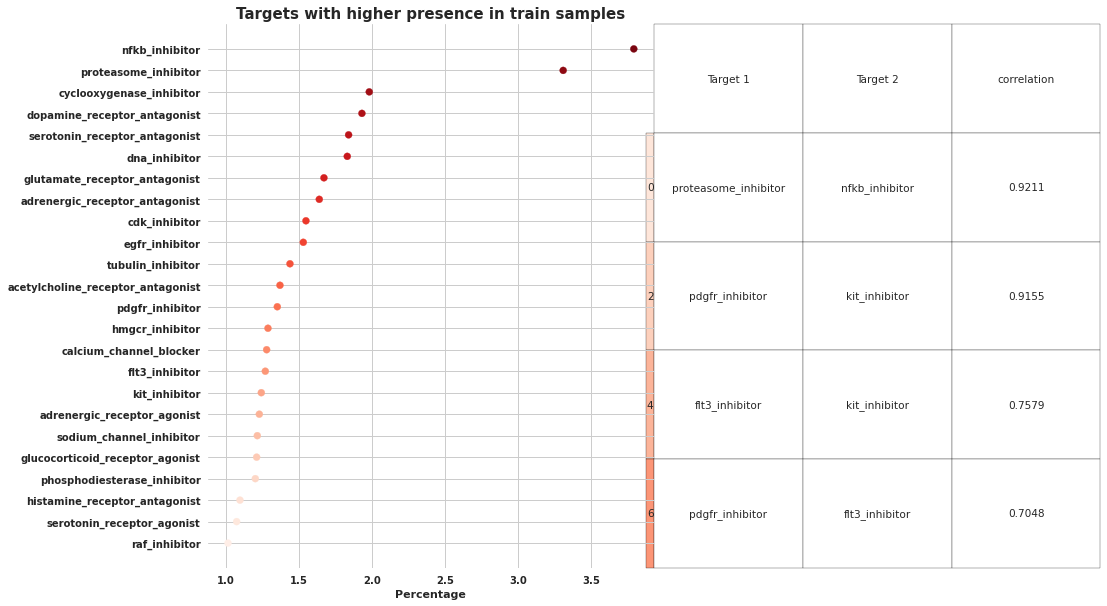

In [22]:
plt.figure(figsize=(8,10))
the_table =plt.table(cellText=so3.values,colWidths = [0.35]*len(so3.columns),
          rowLabels=so3.index,
          colLabels=so3.columns
          ,cellLoc = 'center', rowLoc = 'center',
          loc='left', edges='closed', bbox=(1,0, 1, 1)
         ,rowColours=sns.color_palette('Reds',10))
the_table.auto_set_font_size(False)
the_table.set_fontsize(10.5)
the_table.scale(2, 2)
average_filtered.sort_values('percentage', inplace=True) 
plt.scatter(average_filtered['percentage'], average_filtered['drug'], color=sns.color_palette('Reds',len(average_filtered)))
plt.title('Targets with higher presence in train samples', weight='bold', fontsize=15)
plt.xlabel('Percentage', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

* **Observations:**

>1. **nfkb_inhibitor and proteasome_inhibitor** have +0.9 correlation and are highly presented in the samples.
2.  **Kit_inhibtor** is highly correlated with 2 targets: **pdgfr_inhibitor and flt3_inhibitor**.

The samples having +2 active targets most probably include those 4 target pairs.
***
> ## 4-2 Nonscored targets:

In this section, we will have a look over the dataset provided that will not be used in the score. This dataset has 402 MoAs *(more than the 206 MoAs in the targets_scored dataset that will be used in the score).* 

This dataset can be used for transfer learning!

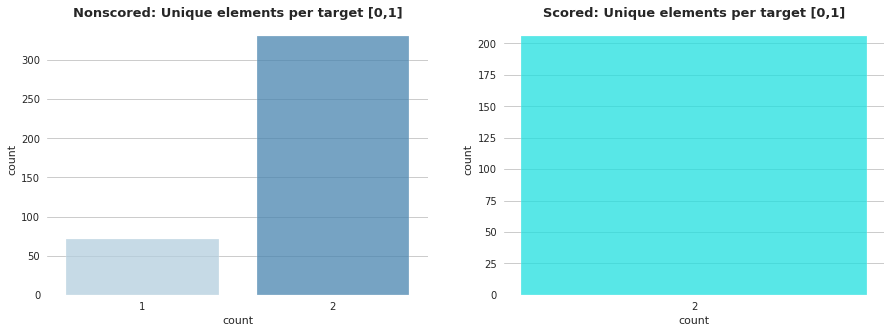

In [23]:
#Extract unique elements per column
cols2 = nonscored.columns.to_list() # specify the columns whose unique values you want here
uniques2 = {col: nonscored[col].nunique() for col in cols2}
uniques2=pd.DataFrame(uniques2, index=[0]).T
uniques2=uniques2.rename(columns={0:'count'})
uniques2= uniques2.drop('sig_id', axis=0)

#############################
### PLOT
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(uniques2['count'], palette='Blues', alpha=0.75)
plt.title('Nonscored: Unique elements per target [0,1]', fontsize=13, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(uniques['count'], color='cyan', alpha=0.75)
plt.title('Scored: Unique elements per target [0,1]', fontsize=13, weight='bold')
plt.show()

In [24]:
print(f"{len(uniques2[uniques2['count']==1])} targets without ANY mechanism of action in the nonscored dataset")

71 targets without ANY mechanism of action in the nonscored dataset


* We have seen in the previous section that the scored targets had [0,1] in all the samples, in other words, **ALL THE TARGETS HAD A MoA IN AT LEAST ONE SAMPLE.**

* Here, we see that the extra nonscored dataset contains **71 targets without ANY mechanism or action MoA.**

Now that we know that 71 targets don't have any mechanism of action, let's compare the targets with MoA in the nonscore dataset with the score one.

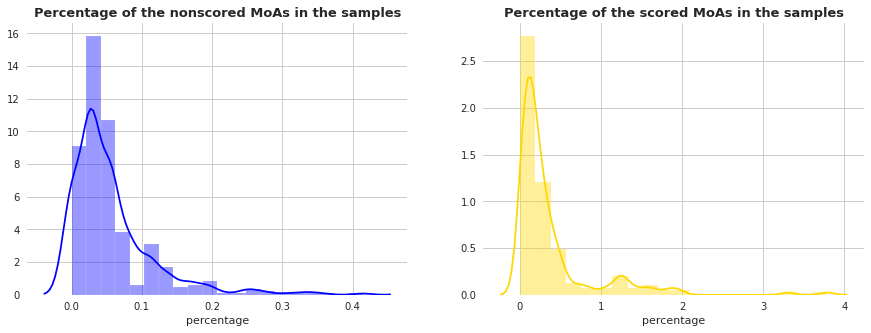

In [25]:
#Filter out just the treated samples
#Calculate the mean values
average2=nonscored.mean()
average2=pd.DataFrame(average2)
average2=average2.rename(columns={ 0: 'mean'})
average2['percentage']= average2['mean']*100
#Filter just the drugs with mean >0.01
average_filtered2= average2[average2['mean'] > 0.01]
average_filtered2= average_filtered2.reset_index()
average_filtered2= average_filtered2.rename(columns={'index': 'drug'})

#####################
#Plot the percentage of MoAs
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(average2['percentage'], color='blue', bins=20)
plt.title('Percentage of the nonscored MoAs in the samples',weight='bold', fontsize=13)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(average['percentage'], color='gold', bins=20)
plt.title('Percentage of the scored MoAs in the samples',weight='bold', fontsize=13)
plt.show()

* The presence of the nonscored targets in the samples is 10 times lower than the scored ones, which will be translated basically to 1 MoA per target in the samples.

We can deduct from the latest findings that the nonscored targets have less MoA in comparison to the scored ones. However, this doesn't mean that the information in the nonscored dataset can't be useful because if the nonscored targets have just 1 MoA and it happens that this 1 single MoA coincides with the scored targets in the same samples, then we might have interesting correlation between both targets.

To understand this better, let's first merge both scored and nonscored targets datasets and try to find patterns and relationships between the targets in both datasets. 

In [26]:
corrs(adt, 'target', 'target 2', 15, thresh= 0.7)

16.0 target pairs have +0.7 correlation.


,target,target 2,correlation
0,proteasome_inhibitor,nfkb_inhibitor,0.921120
1,nfkb_inhibitor,proteasome_inhibitor,0.921120
2,kit_inhibitor,pdgfr_inhibitor,0.915517
3,pdgfr_inhibitor,kit_inhibitor,0.915517
4,caspase_activator,sars_coronavirus_3c-like_protease_inhibitor,0.816385
5,caspase_activator,nfkb_activator,0.816385
6,nfkb_activator,caspase_activator,0.816385
7,sars_coronavirus_3c-like_protease_inhibitor,caspase_activator,0.816385
8,diacylglycerol_o_acyltransferase_inhibitor,nfkb_activator,0.816385
9,nfkb_activator,diacylglycerol_o_acyltransferase_inhibitor,0.816385


**Great!** This nonscored dataset seems promising. 

If in the `scored_target` dataset we had just 4 target pairs with +0.7 correlation, by merging both datasets we have more than 15 target pairs highly correlated.

### Heatmap of the 31 target with high correlation

In [27]:
#Correlation between drugs
corre= adt.corr()
#Unstack the dataframe
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
#Create new dataframe
so2= pd.DataFrame(so).reset_index()
so2= so2.rename(columns={0: 'correlation', 'level_0':'Drug 1', 'level_1': 'Drug2'})
#Filter out the coef 1 correlation between the same drugs
so2= so2[so2['correlation'] != 1]
#Drop pair duplicates
so2= so2.reset_index()
pos = [1,3,5,7,9, 11,13,15,17,19,21,23, 25, 27, 29, 31,33,35, 37, 39, 41, 43, 45]
so2= so2.drop(so2.index[pos])
#so2= so2.round(decimals=4)
so3=so2.head()
#Show the first 10 high correlations
cm = sns.light_palette("Red", as_cmap=True)
s = so2.head(16).style.background_gradient(cmap=cm)
s
#High correlation adt 22 pairs
adt15= so2.head(22)
#Filter the drug names
adt_1=adt15['Drug 1'].values.tolist()
adt_2=adt15['Drug2'].values.tolist()
#Join the 2 lists
adt3= adt_1 + adt_2
#Keep unique elements and drop duplicates
adt4= list(dict.fromkeys(adt3))
#Filter out the selected drugs from the "all drugs treated" adt dataset
adt5= adt[adt4]

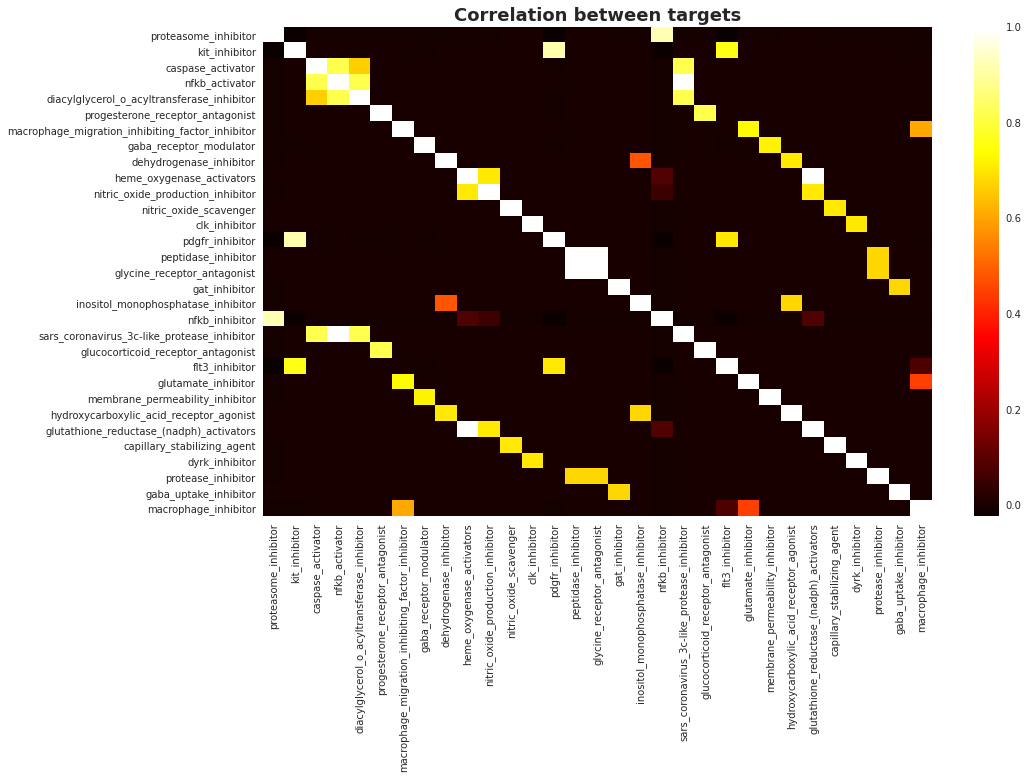

In [28]:
ploth(adt5)

**Interesting!** Even though this is just a visual representation of the table above, here we can clearly see that many targets from the `scored_target` dataset have high correlation with several targets from the `nonscored_targets`.
***

# 5- Test features:
After understanding the relationship between the features and the labels, we move on to the test test to understand the features and their relationship with the train features.
> ## 5-1 Features:

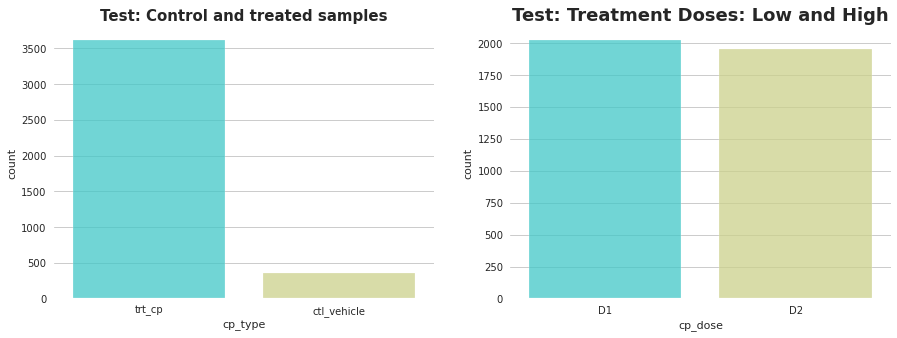

In [29]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='cp_type', data=b, palette='rainbow', alpha=0.75)
plt.title('Test: Control and treated samples', fontsize=15, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='cp_dose', data=b, palette='rainbow', alpha=0.75)
plt.title('Test: Treatment Doses: Low and High',weight='bold', fontsize=18)
plt.show()

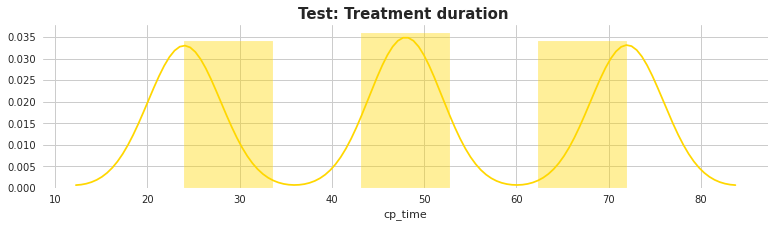

In [30]:
plt.figure(figsize=(13,3))
sns.distplot( b['cp_time'], color='gold', bins=5)
plt.title("Test: Treatment duration ", fontsize=15, weight='bold')
plt.show()

Everything seems similar to the train set:
* The doses are equally applied.
* Very few control samples.
* Same treatment duration 24h, 48h and 72h.

**Good news!** It seems that both train and test datasets are similar in terms of *experimental conditions.* The variation would be in the gene expression and cell viability since the samples used in the test set are different than the train set.

Let's see how different are those samples!

> ## 5-2 Gene expression:

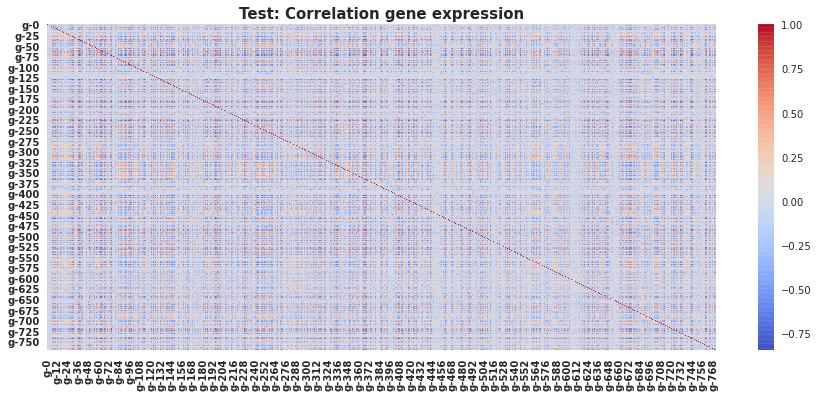

In [31]:
#Filter out just the treated samples
treated2= b[b['cp_type']=='trt_cp']
treated_list2 = treated2['sig_id'].to_list()
full_tr= b[b['sig_id'].isin(treated_list2)]

#Select the columns c-
c_cols2 = [col for col in full_tr.columns if 'g-' in col]
#Filter the columns c-
cells2=treated2[c_cols2]
#Plot heatmap
plt.figure(figsize=(15,6))
sns.heatmap(cells2.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Test: Correlation gene expression', fontsize=15, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

We can see several high positive and negative correlations between some genes, same as in the train set. However more investigation is needed to find some patterns and differences in gene expression in the test set.

> ### Top 10 gene pairs in the test set:

In [32]:
#Correlation between drugs
corre= cells2.corr()
#Unstack the dataframe
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
#Create new dataframe
so2= pd.DataFrame(so).reset_index()
so2= so2.rename(columns={0: 'correlation', 'level_0':'Gene 1', 'level_1': 'Gene 2'})
#Filter out the coef 1 correlation between the same drugs
so2= so2[so2['correlation'] != 1]
#Drop pair duplicates
so2= so2.reset_index()
#so2= so2.sort_values(by=['correlation'])
pos = [1,3,5,7,9,11,13,15,17,19,21]
so2= so2.drop(so2.index[pos])
so2= so2.round(decimals=4)
so2=so2.drop('index', axis=1)
so4=so2.head(10)
cm = sns.light_palette("Red", as_cmap=True)
s = so2.head(10).style.background_gradient(cmap=cm)
s

,Gene 1,Gene 2,correlation
0,g-50,g-37,0.912500
2,g-744,g-123,0.854000
4,g-349,g-460,0.853800
6,g-50,g-672,0.852700
8,g-369,g-569,0.851300
10,g-195,g-63,0.850400
12,g-195,g-228,0.844100
14,g-460,g-248,0.842600
16,g-72,g-37,0.840100
18,g-228,g-406,0.838900


**Observations:**
* **5/10** high correlated genes are the same as in the train set *(see section 3.2).*
* **5** new gene pairs seem to be highly correlated in the test set then in the train set.
* This is just a quick look over the TOP10 genes. I will update this section in the future with deeper analysis.

Understanding the difference between the genes correlation in the train and test sets will be crucial to determine and prevent the shake-up.

> ## 5-3 Cell viability:

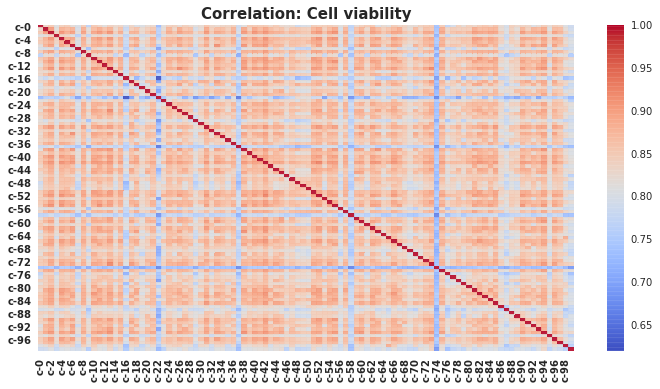

In [33]:
#Select the columns c-
c_cols3 = [col for col in b.columns if 'c-' in col]
#Filter the columns c-
cells3=treated[c_cols3]
#Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cells3.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Correlation: Cell viability', fontsize=15, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

Again, the first impression is that all the cell viability features have high correlation, same as in the train set. With some specific cell types having low correlation than others *(c-24, c-22, c-73, c-73...).*

In [34]:
def plotf2(f1, f2, f3, f4):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')

    fig= plt.figure(figsize=(15,10))
    #2 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((2,2),(0,0))
    sns.distplot(cells3[f1], color='crimson')
    plt.title(f1,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #first row sec col
    ax1 = plt.subplot2grid((2,2), (0, 1))
    sns.distplot(cells3[f2], color='gainsboro')
    plt.title(f2,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #Second row first column
    ax1 = plt.subplot2grid((2,2), (1, 0))
    sns.distplot(cells3[f3], color='darkred')
    plt.title(f3,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #second row second column
    ax1 = plt.subplot2grid((2,2), (1, 1))
    sns.distplot(cells3[f4], color='black')
    plt.title(f4,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    return plt.show()

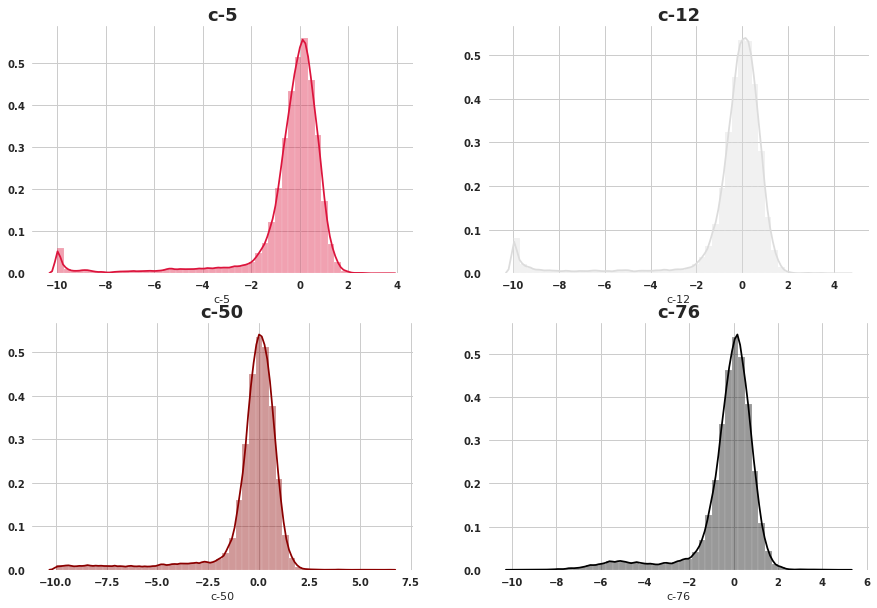

In [35]:
plotf2('c-5', 'c-12', 'c-50', 'c-76')

***
# References:

[1] Viability assay https://en.wikipedia.org/wiki/Viability_assay

[2] COVID-19 viral proteins identification https://www.kaggle.com/amiiiney/covid-19-proteins-identification-with-biopython

[3] Gene expression level https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level

[4] Image credit: https://www.labiotech.eu/cancer/forx-therapeutics-cancer-treatment/